In [114]:
import pandas as pd
import seaborn as sns
sns.set_theme()

# Data Preprocessing

In [115]:
raw_df = pd.read_csv('../data/vehicle_raw.csv')

### Drop Unnecessary Column

In [116]:
# remove model column (312 unique values are too much + unnecessary)
data = raw_df.drop(['Model'], axis=1)
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


### Drop Rows with Null

In [117]:
# sum of null values => in percentage
(data.isnull().sum() / len(data)) * 100 

Brand           0.000000
Price           3.958573
Body            0.000000
Mileage         0.000000
EngineV         3.452244
Engine Type     0.000000
Registration    0.000000
Year            0.000000
dtype: float64

In [118]:
# lower than 5% => we'll just drop those rows
data.dropna(axis=0, inplace=True)

### Remove Price Outlier

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4025 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 283.0+ KB


count      4025.000000
mean      19552.308065
std       25815.734988
min         600.000000
25%        6999.000000
50%       11500.000000
75%       21900.000000
max      300000.000000
Name: Price, dtype: float64

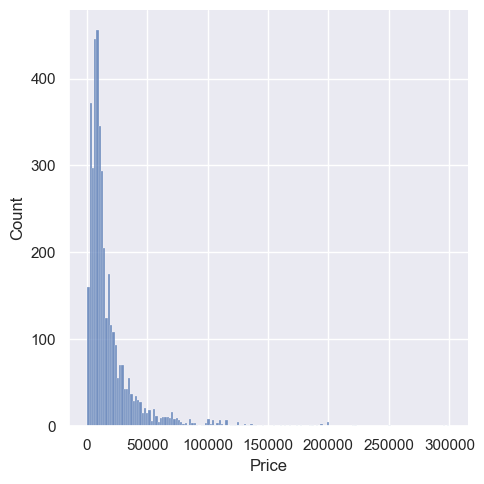

In [120]:
# Focus on Price, EngineV, Mileage bc they're numbers => examin PDFs
sns.displot(data['Price'])
data['Price'].describe()


103999.0

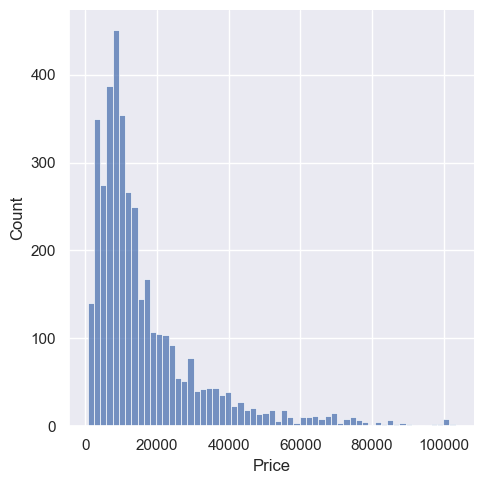

In [121]:
top98 = data['Price'].quantile(0.98)
display(top98)

data_rm_outlier_price = data[data['Price'] < top98]
sns.displot(data_rm_outlier_price['Price'])

### Remove Mileage Outlier

count    3943.000000
mean      166.739538
std       102.042365
min         0.000000
25%        95.000000
50%       160.000000
75%       230.000000
max       980.000000
Name: Mileage, dtype: float64

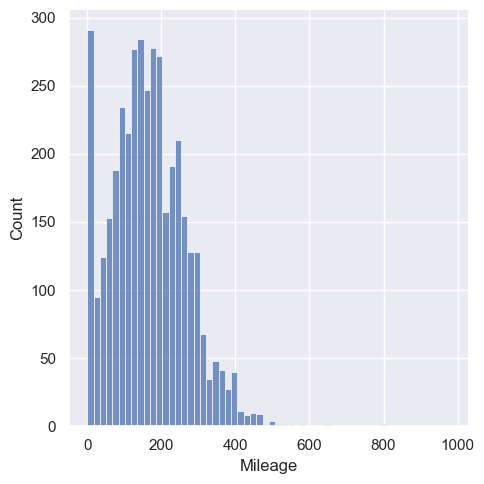

In [122]:
sns.displot(data_rm_outlier_price['Mileage'])
data_rm_outlier_price['Mileage'].describe()

436.7399999999998

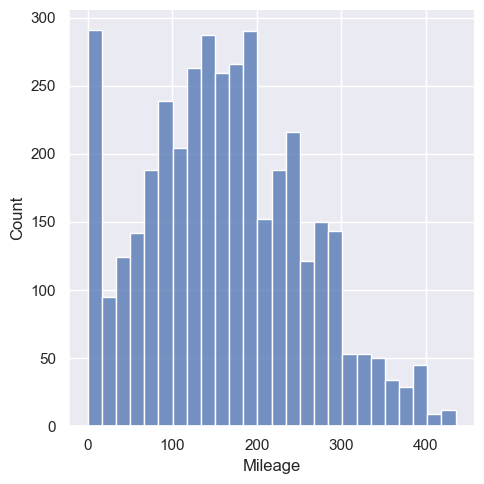

In [123]:
top99 = data_rm_outlier_price['Mileage'].quantile(0.99)
display(top99)

data_rm_outlier_mileage = data_rm_outlier_price[data_rm_outlier_price['Mileage'] < top99]
sns.displot(data_rm_outlier_mileage['Mileage'])

### Remove Enginge Volume Outlier

count    3903.000000
mean        2.742242
std         5.005715
min         0.600000
25%         1.800000
50%         2.200000
75%         3.000000
max        99.990000
Name: EngineV, dtype: float64

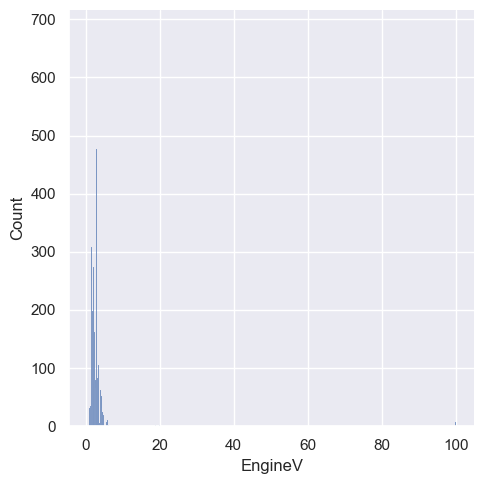

In [124]:
sns.displot(data_rm_outlier_mileage['EngineV'])
data_rm_outlier_mileage['EngineV'].describe()

6.0

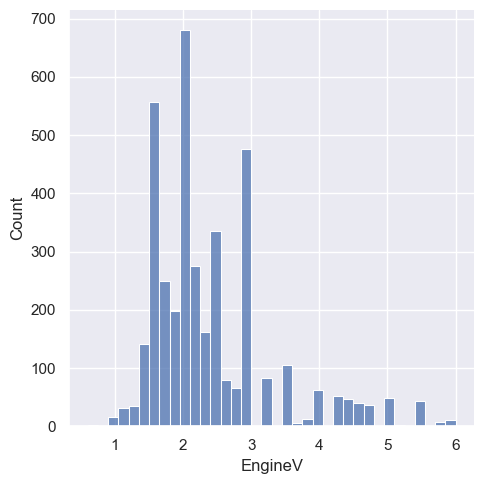

In [125]:
top99 = data_rm_outlier_mileage['EngineV'].quantile(0.99)
display(top99)

data_rm_outlier_engineV = data_rm_outlier_mileage[data_rm_outlier_mileage['EngineV'] <= top99]
sns.displot(data_rm_outlier_engineV['EngineV'])

### Remove Year Outlier

count    3864.000000
mean     2006.297619
std         6.572792
min      1969.000000
25%      2003.000000
50%      2007.000000
75%      2011.000000
max      2016.000000
Name: Year, dtype: float64

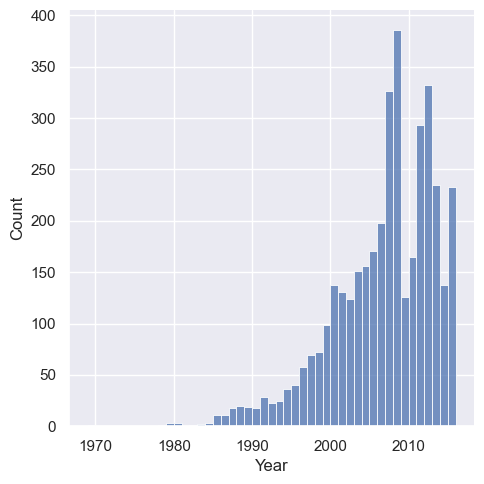

In [126]:
sns.displot(data_rm_outlier_engineV['Year'])
data_rm_outlier_engineV['Year'].describe()
# note that it's skewed to the right -> remove bottom n% values

1987.0

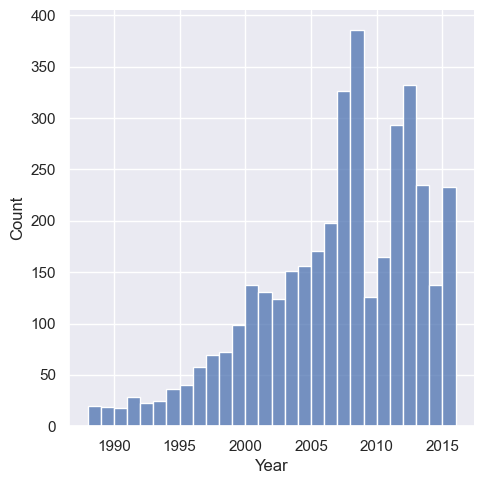

In [127]:
bott1 = data_rm_outlier_engineV['Year'].quantile(0.01)
display(bott1)

data_rm_outlier_year = data_rm_outlier_engineV[data_rm_outlier_engineV['Year'] > bott1]
sns.displot(data_rm_outlier_year['Year'])

### Reset Index

In [128]:
data_rm_outlier = data_rm_outlier_year
data_rm_outlier.head(10) # There's no inex 5, 6, ...etc -> bc we removed these rows while preprocessing

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999
10,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011
11,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994


In [129]:
data_clean = data_rm_outlier.reset_index(drop=True)
data_rm_outlier.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999
10,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011
11,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994


### Final Data

In [130]:
data_clean.describe(include='all')


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3810,3810.000000,3810,3810.000000,3810.000000,3810,3810,3810.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1445,NaN,NaN,1772,3448,NaN
mean,NaN,17048.352785,NaN,162.471129,2.425654,NaN,NaN,2006.604462
std,NaN,16280.843739,NaN,94.871013,0.916645,NaN,NaN,6.076327
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7155.000000,NaN,95.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,159.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,20900.000000,NaN,228.750000,3.000000,NaN,NaN,2011.000000


In [131]:
data_clean.to_csv("../data/vehicle_clean.csv", index=False)